In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from base64 import b64encode 
from io import BytesIO 
from IPython.display import HTML 
from matplotlib_inline.backend_inline import set_matplotlib_formats 

set_matplotlib_formats('svg')

In [2]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60']

In [3]:
n = 100 
data = [
    ('APPL', 40000*np.random.rand(n).round(2)),
    ('MSFT', 20000*np.random.rand(n).round(2)),
    ('GOOG', 500*np.random.rand(n).round(2)),
    ('META', 150*np.random.rand(n).round(2)), 
]

df = pd.DataFrame(data, columns=['Name', 'Price History'])

In [4]:
def create_line(data):

    data = list(data)

    fig, ax = plt.subplots(1, 1, figsize=(2, 0.5), facecolor='none')

    if data[0]>data[-1]:
        chart_color = colors[0]
    else: 
        chart_color = colors[3]
    
    ax.plot(data, color=chart_color)

    ax.axis('off')
    plt.plot(len(data) - 1, data[len(data) - 1], 'b.')

    plt.close(fig)

    img = BytesIO()

    fig.savefig(img, format='png')
    
    encoded = b64encode(img.getvalue())

    decoded = encoded.decode('utf-8')

    return '<img src="data:image/png;base64,{}"/>'.format(decoded)

In [5]:
from base64 import b64encode 
from io import BytesIO

def create_hist(data):
    fig, ax = plt.subplots(figsize=(2, 0.5), facecolor='none')
    ax.hist(data, bins=10, color=colors[2])
    ax.axis('off')
    plt.close(fig)
    img = BytesIO()
    fig.savefig(img)
    encoded = b64encode(img.getvalue())
    decoded = encoded.decode('utf-8')
    return f'<img src="data:png;base64,{decoded}">'

,Name,Day Price History,Hourly Trade Volume
0,APPL,,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAAAyCAYAAAAZUZThAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAN5JREFUeJzt3NENgkAQQEExlmIL1mRN1mQL9nI2oO+DEE90pgEuJC+7QMIyxjgArx1nHwC+mUAgCASCQCAIBIJAIAgEwmn2Ada63B6rPuDcr+dl67Pwu0wQCAKBIBAIAoGw24f0T/NSYHt7uKcmCASBQPi7FWvtWJ9xPevZfCYIBIFAmL5ifXrl2RP3Zj4TBIJAIAgEgkAgCASCQCAIBIJAIAgEgkAgCASCQCAIBIJAIAgEgkAgCASCQCAIBIJAIAgEgkAgCASCQCAIBMIyhp/3wTsmCASBQBAIBIFAeAJ3Ih5g7PlvcwAAAABJRU5ErkJggg=="">"
1,MSFT,,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAAAyCAYAAAAZUZThAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAOBJREFUeJzt3NENgjAUQFExjuIKzuRMzuQK7oILyE0kxkI4Z4L+3L4CKdM8zyfgs/PoBcCWCQSCQCAIBIJAIAgEgkAgXEYvgP27PV6rPqY979fp12v5NRMEwuEmyNrdbq097JIsM0EgCATC4Y5YLPv38XMPTBAIAoEgEAgCgeAhfcM8NI9ngkAQCASBQBAIBIFAEAgEgUCYRv9Z0bt+vvXPOzYmCASBQBAIBIFAEAgEgUAQCASBQBAIBIFAEAgEgUAQCASBQBAIBIFAEAgEgUAYfuUWtswEgSAQCAKBIBAIbx0JGrMnX+seAAAAAElFTkSuQmCC"">"
2,GOOG,,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAAAyCAYAAAAZUZThAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAO5JREFUeJzt2tFtwkAQQEGMKIUWqCk1pSZaoJdLASHvw3Jkn5lpwBbS095yXsYYF+C9694vAEcmEAgCgSAQCAKBIBAIAoFw2/sF1np8v1Zd4Dy/7ssMz5vJmX8bEwSCQCAIBIJAIEy7pLO9tcv2mZkgEAQCQSAQBALh45b0mRbRM99Qz8IEgSAQCB93xOI4ZjhCmiAQBAJBIBAEAsGS/s9munfhNxMEgkAg7H7EcgThyEwQCAKBIBAIAoGw+5LO9vzxsR0TBIJAIAgEgkAgCASCQCAIBIJAIAgEgkAgLGP4KgH+YoJAEAgEgUAQCIQfClAnuLxzRpUAAAAASUVORK5CYII="">"
3,META,,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAAAyCAYAAAAZUZThAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAOpJREFUeJzt3IGJAjEQQNHbw1JswZqs6WqyBXuJBaifYxGykfcqCIHPDBvYbYzxA7z2O/sAcGQCgSAQCAKBIBAIAoEgEAin2QfY6/J33/WAc7uet0+f5WhWuZsVzmmCQBAIhGVXrL1WGOur2XunKzBBIAgEwvQV65vHM+szQSAIBML0FYvjsO4+M0EgCASCFeufZqwfHifnM0EgCASCFevAfFWazwSBIBAIAoEgEAgCgSAQCAKBIBAIAoEgEAgCgSAQCAKBIBAIAoEgEAgCgSAQCAKBIBAIAoGwjeHHGfCOCQJBIBAEAkEgEB7SziUNUflcWQAAAABJRU5ErkJggg=="">"

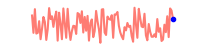
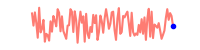
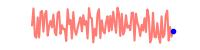
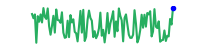

In [6]:
df['Day Price History'] = df['Price History'].apply(create_line)
df['Hourly Trade Volume'] = df['Price History'].apply(create_hist)
HTML(df.drop(columns=["Price History"]).to_html(escape=False))